# More Visualization in Python

Welcome to Jupyter Notebook!  The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text.

To navigate in the interactive notebook, look for cells with ` In [] ` in front of them - those are known as Code cells, and can be run by pressing Shift-Enter.

For this week's exercise, we'll be using several Python libraries to explore and visualize our data.  First, we need to import the libraries:

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

This next command is optional, but it will set the default style (appearance) of plots we create with Seaborn:

In [2]:
sns.set(style="white", color_codes=True)

### Load Data

We'll use Pandas to read our CSV file:

In [5]:
mpg = pd.read_csv("mpg.csv")

This data set looks at motor vehicles, with information about the type of vehicle, the type and size (displacement) of the engine, and the gas mileage in the city and highway.

In [6]:
mpg.head()

,id,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


To get a count of how many values we have in a certain category, we can use the ` value_counts ` command in Pandas.  For example, we can look at how many vehicles we have in each class:

In [7]:
mpg["class"].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

### Visualizing Our Data

#### Scatterplots
Pandas comes with a simple visualization functionality called ` plot `.  To use it, you must pass in a ` kind= ` command.  For example, to create a scatterplot:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='hwy', ylabel='displ'>

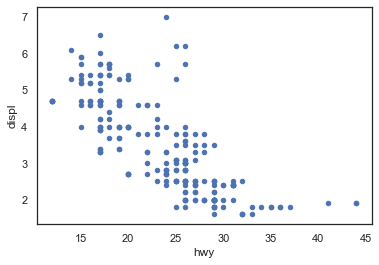

In [8]:
mpg.plot(kind="scatter", x="hwy", y="displ")

Seaborn allows us to take the basic scatterplot to another level, by including a histogram along the outer edges.  Each histogram shows the distribution of values along that particular axis.

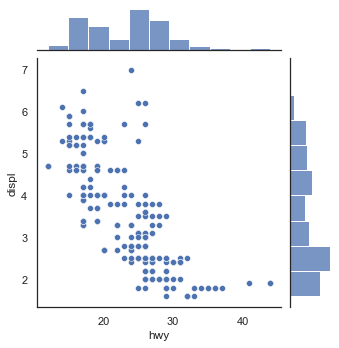

In [9]:
sns.jointplot(x="hwy", y="displ", data=mpg, height=5)

We could also add an additional variable to our scatterplot by adding color.  For example, we can color by the class of vehicle:

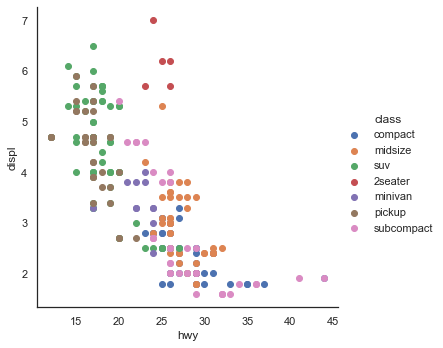

In [10]:
sns.FacetGrid(mpg, hue="class", height=5) \
.map(plt.scatter, "hwy", "displ") \
.add_legend()  

You can also add a linear model to your scatterplot to easily illustrate trends.  In the example below, we are coloring by drive (forward, rear, or 4-wheel), and then drawing a linear model for each:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


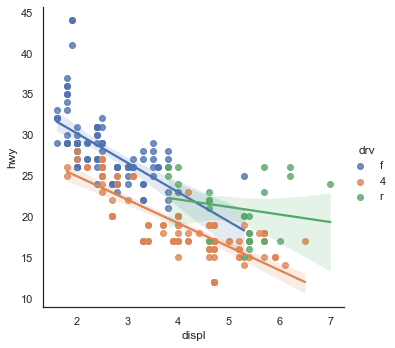

In [11]:
sns.lmplot('displ','hwy',data=mpg,hue='drv')

#### Boxplots

Let's start with a basic boxplot.  We'll create separate boxplots for each class of vehicle:

<AxesSubplot:xlabel='class', ylabel='hwy'>

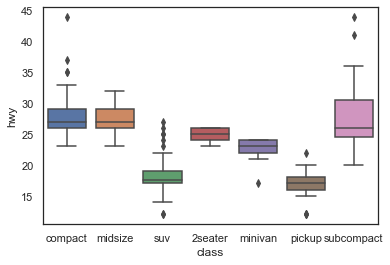

In [12]:
sns.boxplot(x="class", y="hwy", data=mpg)

For some additional context to our data, we can add a horizontal line for the mean value across the entire data set.  For example, let's look at the mean hwy mileage for all vehicles, and then show how each class stacks up to the mean:

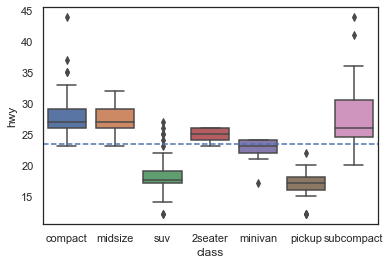

In [13]:
sns.boxplot(x="class",y="hwy", data=mpg)
plt.axhline(mpg.hwy.mean(), color='b',linestyle='dashed')

You can add additional layers to a plot, by adding a second line with an additional plot.  In the example below, we're showing a boxplot and a "stripplot" layered on top of each other.  This is a technique that allows you to see both the summary and details at the same time:

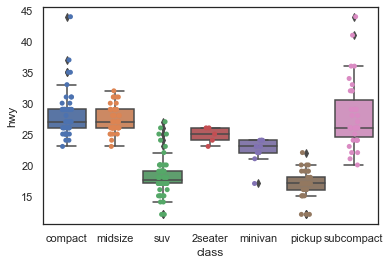

In [14]:
ax = sns.boxplot(x="class", y="hwy", data=mpg)
ax = sns.stripplot(x="class", y="hwy", data=mpg, jitter=True, edgecolor="gray")

While that's an interesting approach, it does result in a pretty cluttered view.  A different type of plot can be used to show how values are distributed within a boxplot, which is called a violin plot.  Here, the wide areas represent a higher density of values, and the narrow areas represent a lower density.  If you look closely, you'll still see the IQR represented inside each violin:

<AxesSubplot:xlabel='class', ylabel='hwy'>

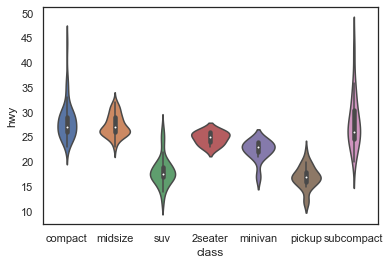

In [15]:
sns.violinplot(x="class", y="hwy", data=mpg, size=6)

#### Correlations

Pandas includes a tool for automatically calculating correlations across all numeric columns:

In [16]:
mpg.corr()

,id,displ,year,cyl,cty,hwy
id,1.000000,-0.402459,-0.073577,-0.407698,0.401822,0.327046
displ,-0.402459,1.000000,0.147843,0.930227,-0.798524,-0.766020
year,-0.073577,0.147843,1.000000,0.122245,-0.037232,0.002158
cyl,-0.407698,0.930227,0.122245,1.000000,-0.805771,-0.761912
cty,0.401822,-0.798524,-0.037232,-0.805771,1.000000,0.955916
hwy,0.327046,-0.766020,0.002158,-0.761912,0.955916,1.000000


We can build a heatmap to visualize the correlations.  In the example below, notice how we are also setting a color scheme, annotation on each cell, and a narrow white line between cells to make it appear a little cleaner:

<AxesSubplot:>

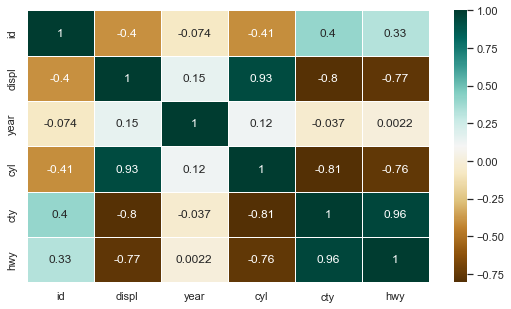

In [17]:
plt.figure(figsize=(9,5))
c=mpg.corr()
sns.heatmap(c,cmap='BrBG',annot=True, linewidth=0.5)